##### Problem statement
Given File:

amazon_jobs_dataset.csv
It is a dataset including information on amazon job opening around the world from June 2011 to March 2018. This dataset is collected using Selenium and BeautifulSoup by scraping all of the jobs for Amazon job site.

##### Problem Statement :
Plot the scatter graph between year vs No. of jobs opening related to Java.

Print the year and number of Jobs opening in Java Profile.

Note: Use the Keyword 'Java' or 'java' in Basic Qualification feature for finding the job opening related to Java Profile. Print the year in ascending order.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
file_path  = 'C:/Users/5530/Downloads/amazon_jobs_dataset.csv'
Amazon_jobs = pd.read_csv(file_path)
Amazon_jobs.head(2)

,Unnamed: 0,Title,location,Posting_date,DESCRIPTION,BASIC QUALIFICATIONS,PREFERRED QUALIFICATIONS
0,0,Software Development Manager,"US, WA, Seattle","March 1, 2018",You are an experienced hands-on manager with a...,· Proven track record of hiring and managing h...,· Experience building extremely high volume an...
1,1,Software Development Engineer,"IN, KA, Bangalore","March 1, 2018",Amazon is driven by being “the world’s most cu...,· Bachelor’s Degree in Computer Science or rel...,· Experience building complex software systems...


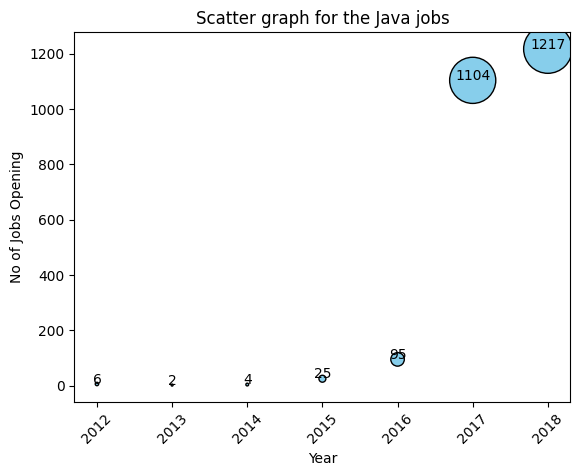

2013 2
2014 4
2012 6
2015 25
2016 95
2017 1104
2018 1217


In [ ]:
Amazon_jobs_java=Amazon_jobs[Amazon_jobs['BASIC QUALIFICATIONS'].str.contains('Java',case=False,na=False)]
year_java=pd.to_datetime(Amazon_jobs_java['Posting_date']).dt.year

# We are using value count beacuse there will we some diff in job_opening every yaer if not then we will use size() to make it work
value_of_date=year_java.value_counts(ascending=True)
plt.scatter(value_of_date.index,
            value_of_date.values
            ,s=value_of_date,
            color='skyblue',
            edgecolor ='black'
            )

plt.title('Scatter graph for the Java jobs')
plt.xlabel('Year')
plt.ylabel('No of Jobs Opening')

for i in range(len(value_of_date.index)):
    plt.text(
        x=value_of_date.index[i],                  # x-coordinate of the point
        y=value_of_date.values[i] + 1,           # y-coordinate slightly above the point
        s=str(value_of_date.values[i]),            # Text to display (the count)
        fontsize=10,                               # Font size of the text
        ha='center',                               # Horizontal alignment
        color='Black'                                # Text color
    )

plt.xticks(rotation=45)
plt.show()


for i,x in value_of_date.items():
  print(i,x)

2012 6
2013 2
2014 4
2015 25
2016 95
2017 1104
2018 1217


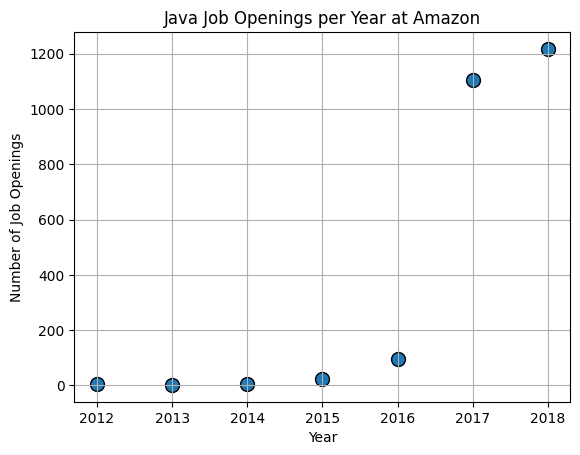

In [ ]:
# Different Approach to get the Data represnted in the Scatter plot

import pandas as pd
import matplotlib.pyplot as plt
file_path  = 'C:/Users/5530/Downloads/amazon_jobs_dataset.csv'
# Read data file
data = pd.read_csv(file_path, encoding='utf-8')
# Filter jobs requiring Java
java_jobs = data[data['BASIC QUALIFICATIONS'].str.contains('java', case=False, na=False)].copy()

# Convert Posting Date to datetime
java_jobs.loc[:, 'DATE'] = pd.to_datetime(java_jobs['Posting_date'])

# Set date range for filtering
start_date = '2011-06-01'
end_date = '2018-03-31'

# Filter jobs within the specified date range
java_jobs = java_jobs[(java_jobs['DATE'] >= start_date) & (java_jobs['DATE'] <= end_date)]

# Extract the year from the Posting Date
java_jobs['YEAR'] = java_jobs['DATE'].dt.year

# Group by year and count job openings
jobs_per_year = java_jobs.groupby('YEAR').size().reset_index(name='JOB_OPENINGS')

# Print the number of Java job openings per year
for index, row in jobs_per_year.iterrows():
    print(f"{row['YEAR']} {row['JOB_OPENINGS']}")

# Scatter plot of job openings per year
plt.scatter(jobs_per_year['YEAR'], jobs_per_year['JOB_OPENINGS'], edgecolors='black', s=100)
plt.title('Java Job Openings per Year at Amazon')
plt.xlabel('Year')
plt.ylabel('Number of Job Openings')
plt.grid(True)
plt.show()


